In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing the dataset
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv')
df = df.dropna() #remove the missing values from dataset
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [4]:
#check the shape of the dataset
df.shape

(1821, 6)

<Axes: >

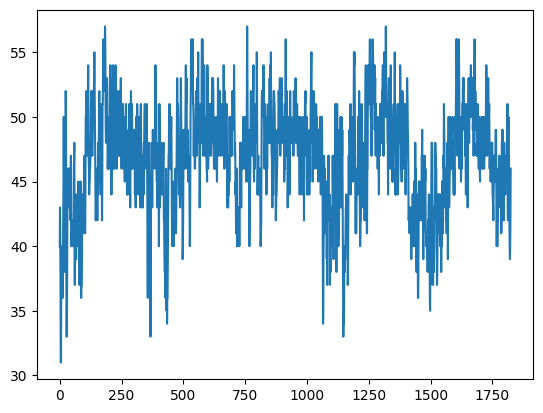

In [5]:
#plotting the data
df['AvgTemp'].plot()

### we can see that our plot has a constant mean aroung 45. and we cant see a trend in our plot.

In [6]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller  #importing adfuller test to check stationarity.

def adfuller_test(dataset):
  df_test = adfuller(dataset , autolag = 'AIC')
  print(f' ADF:{df_test[0]} ')
  print(f' P-value:{df_test[1]} ')
  print(f' Num_of_lags:{df_test[2]} ')
  print(f' No._of_obs_used:{df_test[3]} ')

adfuller_test(df['AvgTemp'])


 ADF:-6.554680125068777 
 P-value:8.675937480199653e-09 
 Num_of_lags:12 
 No._of_obs_used:1808 


### Pvalue is less than 0.05, hence our data is stationary.


using Arima model - (AUTO REGRESSION , INTEGRATED , MOVING AVERAGE)<br>
AUTO REGRESSION - 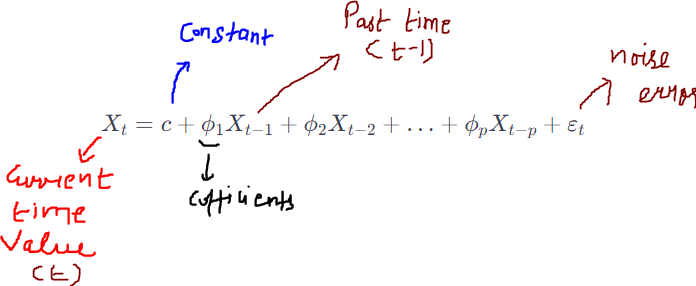
<br>
INTEGRATED - if our data is not stationary we make it stationary.
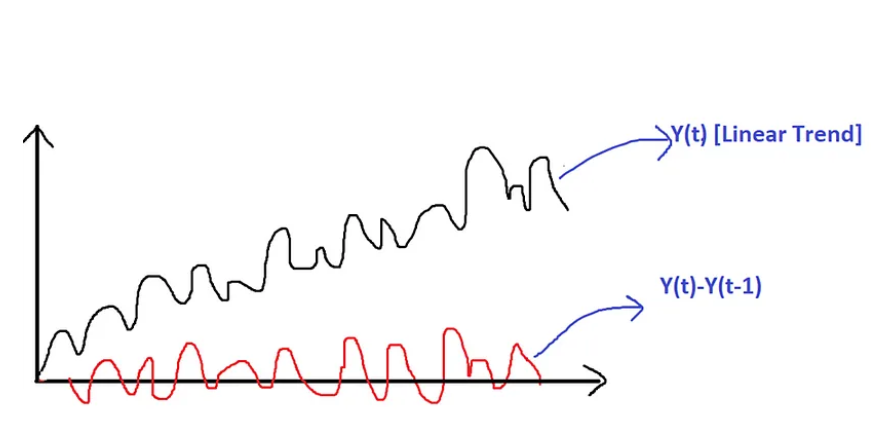
<br>
MOVING AVERAGE - MAKING PREVIOUS ERRORS TO MAKE FUTURE PREDICTION.
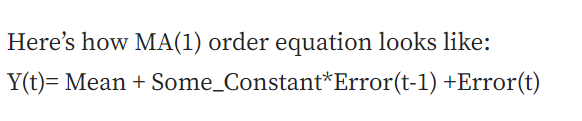


In [7]:
#using auto arima model
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'] , trace = True , suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=4.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.94 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=5.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=8.73 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=8.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=10.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=15.69 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=11.41 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=6.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=6.08 sec
 ARIMA(1,0,4)(0,0,0)[0] inte

In [8]:
#split the dataset into training and testing set
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 6)
(1791, 6) (30, 6)


In [12]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 26 Jan 2024   AIC                           8156.395
Time:                        09:17:13   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#checking the accuracy metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)
print(test['AvgTemp'].mean())

3.000463825206671
45.0


In [16]:
#making future predictions
index_future_dates = pd.date_range(start = '2018-12-30', end = '2019-01-29')
pred = model.predict(start = len(df), end = len(df)+30 , typ = 'levels')
pred.index = index_future_dates

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [22]:
print(pred[:10])

2018-12-30    46.090493
2018-12-31    46.097622
2019-01-01    46.104648
2019-01-02    46.111573
2019-01-03    46.118398
2019-01-04    46.125125
2019-01-05    46.131754
2019-01-06    46.138289
2019-01-07    46.144729
2019-01-08    46.151077
Freq: D, Name: predicted_mean, dtype: float64
